In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as data

In [3]:
start = '2010-01-01'
end = '2021-09-17'
df = data.DataReader('AAPL','yahoo',start,end)
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2009-12-31,7.619643,7.520000,7.611786,7.526071,352410800.0,6.462008
2010-01-04,7.660714,7.585000,7.622500,7.643214,493729600.0,6.562591
2010-01-05,7.699643,7.616071,7.664286,7.656429,601904800.0,6.573935
2010-01-06,7.686786,7.526786,7.656429,7.534643,552160000.0,6.469369
2010-01-07,7.571429,7.466071,7.562500,7.520714,477131200.0,6.457407


In [4]:
df.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-09-13,151.419998,148.750000,150.630005,149.550003,102404300.0,149.550003
2021-09-14,151.070007,146.910004,150.350006,148.119995,109296300.0,148.119995
2021-09-15,149.440002,146.369995,148.559998,149.029999,83281300.0,149.029999
2021-09-16,148.970001,147.220001,148.440002,148.789993,68034100.0,148.789993
2021-09-17,148.820007,145.759995,148.820007,146.059998,129728700.0,146.059998


In [5]:
df = df.reset_index()
df = df.drop(['Date','Adj Close'], axis=1)
df.head()

,High,Low,Open,Close,Volume
0,7.619643,7.520000,7.611786,7.526071,352410800.0
1,7.660714,7.585000,7.622500,7.643214,493729600.0
2,7.699643,7.616071,7.664286,7.656429,601904800.0
3,7.686786,7.526786,7.656429,7.534643,552160000.0
4,7.571429,7.466071,7.562500,7.520714,477131200.0


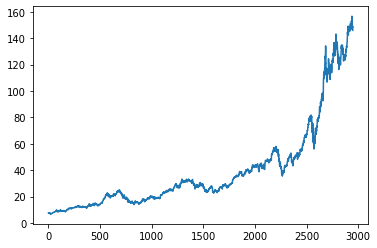

In [6]:
plt.plot(df.Close)

In [7]:
ma100 = df.Close.rolling(100).mean()
ma100

0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
          ...   
2944    138.6135
2945    138.7753
2946    138.9224
2947    139.0631
2948    139.1798
Name: Close, Length: 2949, dtype: float64

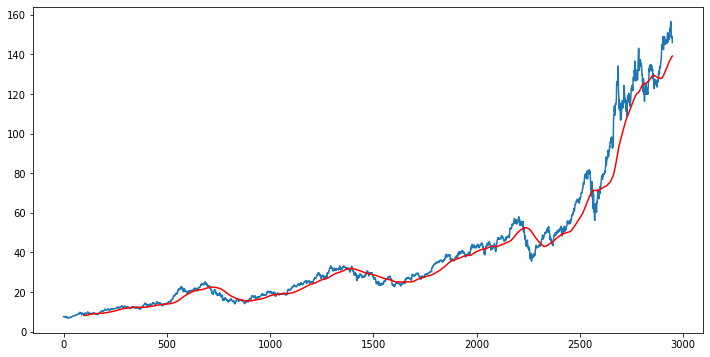

In [8]:
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma100,'r')

In [9]:
ma200 = df.Close.rolling(200).mean()
ma200

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
2944    133.38715
2945    133.54760
2946    133.70980
2947    133.85850
2948    133.97520
Name: Close, Length: 2949, dtype: float64

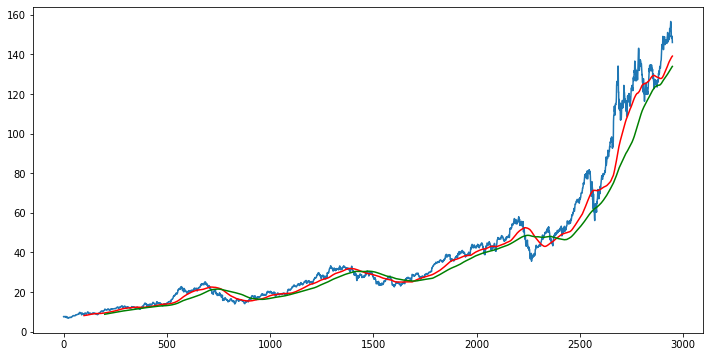

In [10]:
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma100,'r')
plt.plot(ma200,'g')

In [11]:
df.shape

(2949, 5)

In [12]:
# spliting data into tarining and testing
data_training= pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing= pd.DataFrame(df['Close'][int(len(df)*0.70): int(len(df))])
print(data_training.shape)
print(data_testing.shape)

(2064, 1)
(885, 1)


In [13]:
data_training.head()

,Close
0,7.526071
1,7.643214
2,7.656429
3,7.534643
4,7.520714


In [14]:
data_testing.head()

,Close
2064,44.662498
2065,44.505001
2066,43.825001
2067,43.810001
2068,42.817501


In [15]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
data_training_array = scaler.fit_transform(data_training)
data_training_array

array([[0.01729643],
       [0.02033351],
       [0.02067611],
       ...,
       [1.        ],
       [0.9886573 ],
       [0.97874055]])

In [16]:
data_training_array.shape

(2064, 1)

In [18]:
x_train = []
y_train = []
for i in range(100,data_training_array.shape[0]):
    x_train.append(data_training_array[i-100:i])
    y_train.append(data_training_array[i,0])
x_train,y_train = np.array(x_train),np.array(y_train)
np.array(x_train),np.array(y_train)

(array([[[0.01729643],
         [0.02033351],
         [0.02067611],
         ...,
         [0.04654673],
         [0.05065785],
         [0.04923193]],
 
        [[0.02033351],
         [0.02067611],
         [0.01751867],
         ...,
         [0.05065785],
         [0.04923193],
         [0.04820413]],
 
        [[0.02067611],
         [0.01751867],
         [0.01715754],
         ...,
         [0.04923193],
         [0.04820413],
         [0.05675976]],
 
        ...,
 
        [[0.85844316],
         [0.86226724],
         [0.8576653 ],
         ...,
         [0.95663847],
         [0.96901824],
         [0.98872208]],
 
        [[0.86226724],
         [0.8576653 ],
         [0.83316509],
         ...,
         [0.96901824],
         [0.98872208],
         [1.        ]],
 
        [[0.8576653 ],
         [0.83316509],
         [0.83491513],
         ...,
         [0.98872208],
         [1.        ],
         [0.9886573 ]]]),
 array([0.04820413, 0.05675976, 0.06002832, ..., 1.    